<a href="https://colab.research.google.com/github/TheLiss/mlcourse_notebooks/blob/main/mlcourse_assignment__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = {}

In [ ]:
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]

In [ ]:
df_train

{'Looks': ['handsome',
  'handsome',
  'handsome',
  'repulsive',
  'repulsive',
  'repulsive',
  'handsome'],
 'Alcoholic_beverage': ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes'],
 'Eloquence': ['high', 'low', 'average', 'average', 'low', 'high', 'average'],
 'Money_spent': ['lots', 'little', 'lots', 'little', 'lots', 'lots', 'lots']}

In [ ]:
pd.DataFrame(df_train)

,Looks,Alcoholic_beverage,Eloquence,Money_spent
0,handsome,yes,high,lots
1,handsome,yes,low,little
2,handsome,no,average,lots
3,repulsive,no,average,little
4,repulsive,yes,low,lots
5,repulsive,yes,high,lots
6,handsome,yes,average,lots


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
x = np.linspace(0,1,3)
y = np.linspace(0,1,4)

In [ ]:
x

array([0. , 0.5, 1. ])

In [ ]:
y

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [ ]:
np.meshgrid(x,y)

[array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ],
        [0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0.        , 0.        , 0.        ],
        [0.33333333, 0.33333333, 0.33333333],
        [0.66666667, 0.66666667, 0.66666667],
        [1.        , 1.        , 1.        ]])]

In [ ]:
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [ ]:
print(*range(4,-3,-1))

4 3 2 1 0 -1 -2


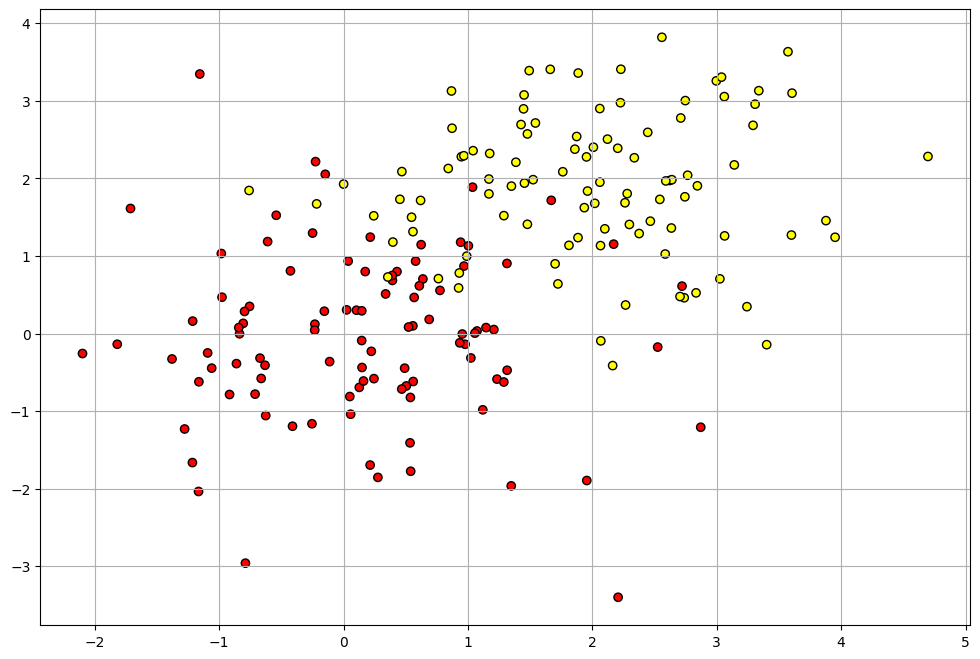

In [ ]:
plt.figure(figsize=[12,8])
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap='autumn', edgecolors='black')
plt.grid()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def mesh_grid(data):
  x_min, x_max = data[:,0].min()-1, data[:,0].max()+1
  y_min, y_max = data[:,1].min()-1, data[:,1].max()+1
  return np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

In [ ]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=17)

In [ ]:
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=17)

In [ ]:
xx, yy = mesh_grid(train_data)

In [ ]:
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

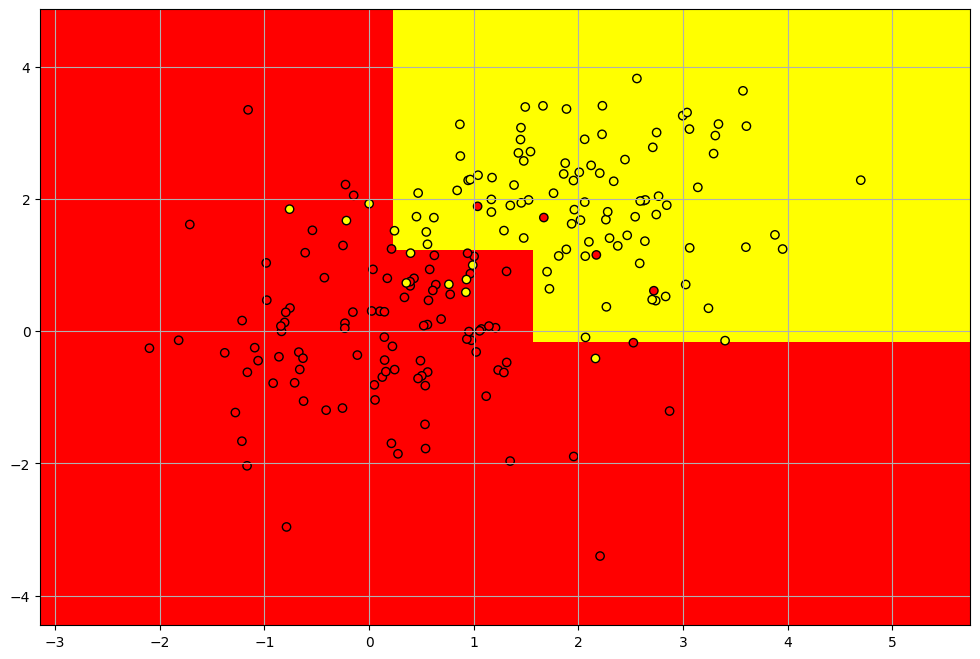

In [ ]:
plt.figure(figsize=[12,8])
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.grid()
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, cmap='autumn', edgecolors='black')

In [ ]:
n_train = 150
n_test = 1000
noize = 0.05

In [ ]:
def function(x):
  return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))

In [ ]:
def gen(n_samples, noize):
  X = np.random.rand(n_samples) * 10 - 5
  X = np.sort(X)
  Y = function(X) + np.random.normal(0, noize, n_samples)
  return X.reshape(-1,1), Y

In [ ]:
X_train, y_train = gen(n_samples=n_train, noize=noize)
X_test, y_test = gen(n_samples=n_test, noize=noize)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(max_depth=8)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
predict = regressor.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=20)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
knn_predict = knn.predict(X_test)

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

In [ ]:
df.head(7)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False


In [ ]:
state = df['State']
y = df['Churn']
df['International plan'] = df['International plan'].factorize()[0]
df['Voice mail plan'] = df['Voice mail plan'].factorize()[0]
df.drop(['State', 'Churn'], axis=1, inplace=True)

In [ ]:
y = y.astype('int')

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_hold , y_train, y_hold = train_test_split(df.to_numpy(), y, test_size=0.3, train_size=0.7)

In [ ]:
(X_train.shape, X_hold.shape)

((2333, 18), (1000, 18))

In [ ]:
tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
tree_predicts = tree.predict(X_hold)
knn_predicts = knn.predict(X_hold)

In [ ]:
tree_mistakes = 1 - np.sum((tree_predicts - y_hold)**2) / y_hold.shape[0]
knn_mistakes = 1 - np.sum((knn_predicts - y_hold)**2) / y_hold.shape[0]
tree_grid_mistakes = 1 - np.sum((tree_grid.predict(X_hold) - y_hold)**2) / y_hold.shape[0]
tree_mistakes, knn_mistakes, tree_grid_mistakes

NameError: name 'tree_grid' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
tree_params = {'max_depth': range(6,8), 'max_features': range(3,20)}

In [ ]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=3)
tree_grid.fit(X_train, y_train)

In [ ]:
tree_grid.best_score_

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [ ]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [ ]:
knn_grid = GridSearchCV(knn_pipe, knn_params, n_jobs=-1, verbose=1)

In [ ]:
knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_score_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [ ]:
forest_params = {'max_depth':range(1,11), 'max_features':range(4,20)}

In [ ]:
forest_grid = GridSearchCV(forest, forest_params, n_jobs=-1)

In [ ]:
forest_grid.best_score_

In [ ]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])